In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [10]:
#intervals are in minutes
#NOTE: file, start, end are all strings! Don't insert object values. 
def data_confirms(file, start, end='N/A', intervals=5, margin_error=0):
    
    #Initial table filtering here, also converting to datetime
    start = datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
    tbl = pd.read_csv("data/" + file)
    tbl["Time"] = tbl["Time"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    tbl = tbl.sort_values(by=['Time'])
    frame = pd.DataFrame(columns=['Value','Point', 'Binary'])
    
    #Defaulted to N/A, but this top block loops until the specified end datetime
    if end != "N/A":
        while(start < dt.strptime(end, '%Y-%m-%d %H:%M:%S')):
            for point in np.arange(0, 10):
                temp = tbl[tbl['Point'] == point]
                next_largest = temp[temp['Time'] > start]['Time'].iloc[0]
                #Rounding to minutes for interval comparisons
                if round((next_largest - start).seconds / 60.0) > (intervals + margin_error) or \
                   round((next_largest - start).seconds / 60.0) <= (intervals - margin_error):
                    frame = frame.append(pd.Series(['no', point, 1], index=['Value','Point', 'Binary']), ignore_index=True)
                else:
                    frame = frame.append(pd.Series(['yes', point, 1], index=['Value','Point', 'Binary']), ignore_index=True)
            start = next_largest
    #The else statement logically the same as above, but with the while loop ending at largest datetime value
    else:
        while(start < max(tbl['Time'].tolist())):
            for point in np.arange(0, 10):
                temp = tbl[tbl['Point'] == point]
                next_largest = temp[temp['Time'] > start]['Time'].iloc[0]
                #print(temp['Point'].empty)
                if round((next_largest - start).seconds / 60.0) > (intervals + margin_error) or \
                   round((next_largest - start).seconds / 60.0) < (intervals - margin_error):
                    frame = frame.append(pd.Series(['no', point, 1], index=['Value','Point', 'Binary']), ignore_index=True)
                else:
                    frame = frame.append(pd.Series(['yes', point, 1], index=['Value','Point', 'Binary']), ignore_index=True)
            start = next_largest
    return frame

In [39]:
frame = data_confirms("49_data.csv", "2019-07-24 17:37:52", margin_error=2)
frame = frame.groupby(['Point', 'Value']).count()
frame = frame.reset_index().sort_values(by=['Value'], ascending=False)

C:\Users\thoma\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


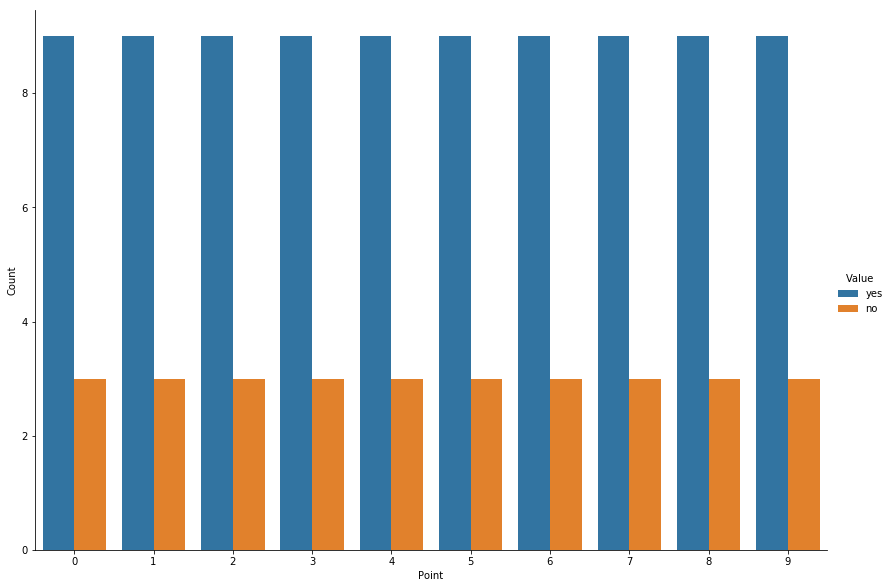

In [40]:
sns.factorplot(x='Point', y='Binary', hue='Value', data=frame, kind='bar', height=8.27, aspect=11.7/8.27)
plt.ylabel('Count');